In [3]:
import onnxruntime as ort
import numpy as np
import torch

# Check run model

In [5]:
model_path = '/home/max/ieos/small_obj/vid_pred/rt-detr.onnx'
session = ort.InferenceSession(model_path)

In [6]:
in_img = session.get_inputs()[0].name
in_shape = session.get_inputs()[1].name

In [7]:
input_data = np.random.randn(1,3,224,224).astype(np.float32)

In [8]:
outputs = session.run(None, {in_img:input_data, in_shape:np.array([[224,224]])})

In [9]:
len(outputs)

3

In [10]:
outputs[0]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
outputs[1].shape

(1, 300, 4)

In [12]:
print(outputs[2].shape)
print(outputs[2])

(1, 300)
[[0.3979084  0.2748263  0.2674674  0.23170733 0.2113955  0.20840475
  0.2065995  0.19357288 0.18503594 0.17035756 0.16923127 0.1600976
  0.15093985 0.14863566 0.13039857 0.12680447 0.11435035 0.10531977
  0.10260248 0.09966436 0.09931874 0.0980325  0.09560773 0.08862489
  0.08752492 0.08368367 0.08187681 0.07876468 0.07686234 0.07662207
  0.07531604 0.07416391 0.07369173 0.0705497  0.06091657 0.05882183
  0.05856395 0.05283427 0.0495612  0.04947588 0.04837435 0.0479081
  0.04719964 0.04641351 0.04540655 0.04224765 0.04055056 0.04054922
  0.04034397 0.03973809 0.03717342 0.03513935 0.03475028 0.03393376
  0.03273824 0.03273556 0.03262693 0.03251326 0.03231937 0.0321278
  0.03138673 0.03095937 0.03011662 0.03010479 0.02937356 0.02838913
  0.02776551 0.02707294 0.02645236 0.02574855 0.02566046 0.02523181
  0.02500838 0.02419418 0.02412817 0.02407414 0.02387229 0.02287525
  0.02282879 0.02273664 0.022632   0.02256879 0.02227393 0.02204016
  0.02198973 0.02174672 0.02171782 0.02150

# Check on real image

In [13]:
import cv2
import os
import json
import numpy as np
import matplotlib.pylab as plt

In [14]:
def load_json(path:str) -> list | dict:
    with open(path, 'rb') as read_file:
        ann = json.load(read_file)
    return ann

In [15]:
img_folder_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_train_1_frame_v2/images"
ann_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_train_1_frame_v2/annotations.json"
ann = load_json(ann_path)

In [16]:
bbox_ann = ann['annotations'][23]
img_ann = ann['images'][bbox_ann['image_id'] - 1]
img_path = os.path.join(img_folder_path, img_ann['file_name'])
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb,(224,224))
img = img_resized.transpose((2, 0, 1))
img = np.expand_dims(img, 0)
img = img.astype(np.float32)
img /= 255

outputs = session.run(None, {in_img:img, in_shape:np.array([[224,224]])})

In [17]:
bbox_ann = ann['annotations'][23]
img_ann = ann['images'][bbox_ann['image_id'] - 1]
img_path = os.path.join(img_folder_path, img_ann['file_name'])
img = cv2.imread(img_path)
img.shape

(480, 640, 3)

In [18]:
image = img[:,:,0]
image = np.expand_dims(image, -1)
image.shape

(480, 640, 1)

In [19]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_rgb.shape

(480, 640, 3)

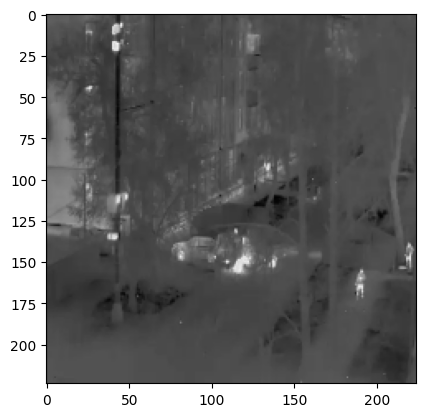

In [20]:
img_resized.shape
plt.imshow(img_resized)

In [21]:
img.shape

(480, 640, 3)

In [22]:
outputs[0]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 

In [23]:
outputs[1]

array([[[185.50525  , 151.93416  , 193.88795  , 177.0108   ],
        [216.3119   , 136.81087  , 222.51729  , 156.87033  ],
        [215.96301  , 136.92603  , 222.0188   , 156.69043  ],
        ...,
        [ 45.094963 , 218.07283  ,  54.312557 , 223.59637  ],
        [170.75905  ,   1.9664702, 178.05594  ,  49.151257 ],
        [ 28.842787 , 217.90096  ,  37.825497 , 223.54787  ]]],
      dtype=float32)

In [24]:
outputs[1].shape

(1, 300, 4)

In [25]:
outputs[2]

array([[8.57738733e-01, 6.72536850e-01, 5.81767380e-01, 2.74871171e-01,
        2.57090330e-01, 9.32668447e-02, 5.26330769e-02, 4.55943346e-02,
        4.31470573e-02, 4.04181182e-02, 3.19490731e-02, 2.22069621e-02,
        1.59199834e-02, 1.57964826e-02, 1.34950280e-02, 1.31704509e-02,
        1.12514496e-02, 1.06688142e-02, 1.05365813e-02, 1.01251006e-02,
        1.00569725e-02, 9.70593095e-03, 9.66149569e-03, 9.23076272e-03,
        9.03406739e-03, 8.96820426e-03, 8.47369432e-03, 8.32951069e-03,
        8.21730494e-03, 8.11925530e-03, 7.79458880e-03, 7.71766901e-03,
        7.18250871e-03, 6.64874911e-03, 6.21819496e-03, 5.99566102e-03,
        5.98707795e-03, 5.47558069e-03, 5.07998466e-03, 5.06967306e-03,
        5.06615639e-03, 5.02902269e-03, 4.98396158e-03, 4.76992130e-03,
        4.74447012e-03, 4.55343723e-03, 4.46525216e-03, 4.46283817e-03,
        4.26715612e-03, 4.25255299e-03, 4.19417024e-03, 4.10053134e-03,
        4.09746170e-03, 4.09334898e-03, 4.06932831e-03, 4.026442

In [26]:
outputs[2].shape

(1, 300)

In [27]:
scores = outputs[2][0]
scores[scores > 0.01]

array([0.85773873, 0.67253685, 0.5817674 , 0.27487117, 0.25709033,
       0.09326684, 0.05263308, 0.04559433, 0.04314706, 0.04041812,
       0.03194907, 0.02220696, 0.01591998, 0.01579648, 0.01349503,
       0.01317045, 0.01125145, 0.01066881, 0.01053658, 0.0101251 ,
       0.01005697], dtype=float32)

num bboxes: 5
box size (pix): w:8 h:25
box size (pix): w:6 h:20
box size (pix): w:6 h:20
box size (pix): w:6 h:21
box size (pix): w:5 h:20


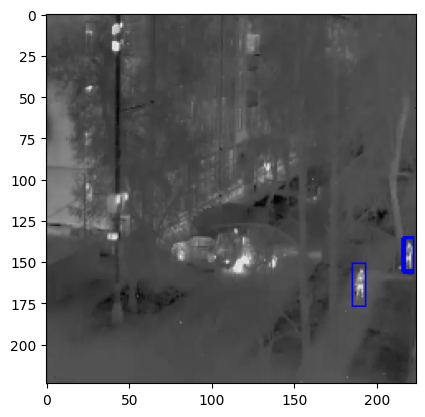

In [28]:
img_draw = img_resized.copy()
scores = outputs[2][0]
bboxes = outputs[1][0][scores > 0.1]
print(f'num bboxes: {len(bboxes)}')
for bbox in bboxes:
    print(f'box size (pix): w:{round(bbox[2] - bbox[0])} h:{round(bbox[3]-bbox[1])}')
    img_draw = cv2.rectangle(img_draw, (int(bbox[2]), int(bbox[3])), (int(bbox[0]), int(bbox[1])),  (0,0,255), 1)
plt.imshow(img_draw);

In [29]:
bboxes

array([[185.50525, 151.93416, 193.88795, 177.0108 ],
       [216.3119 , 136.81087, 222.51729, 156.87033],
       [215.96301, 136.92603, 222.0188 , 156.69043],
       [216.59949, 135.99382, 222.73026, 157.44563],
       [217.00146, 135.54485, 222.2087 , 155.9815 ]], dtype=float32)

In [30]:
bbox_ann['image_id']

17

In [34]:
targets = []
for i in ann['annotations']:
    if i['image_id'] == bbox_ann['image_id']:
        targets.append(i['bbox'])

In [35]:
targets

[[533, 328, 23.0, 47.0], [617, 296, 16.0, 40.0]]